<a href="https://colab.research.google.com/github/psindra/clasificacion-del-set-MNIST-usando-redes-neuronales/blob/master/clasificacion_MNIST_redes_neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import np_utils

import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Lectura, visualización y pre-procesamiento de los datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()

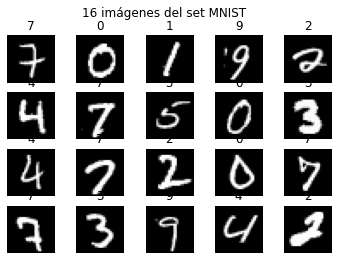

In [9]:
# Visualizaremos 16 imágenes aleatorias tomadas del set x_train
ids_imgs = np.random.randint(0,x_train.shape[0],20)
for i in range(len(ids_imgs)):
	img = x_train[ids_imgs[i],:,:]
	plt.subplot(4,5,i+1)
	plt.imshow(img, cmap='gray')
	plt.axis('off')
	plt.title(y_train[ids_imgs[i]])
plt.suptitle('16 imágenes del set MNIST')
plt.show()

In [23]:
# Pre-procesamiento: para introducirlas a la red neuronal debemos
# "aplanar" cada una de las imágenes en un vector de 28x28 = 784 valores

X_train = np.reshape( x_train, (x_train.shape[0],x_train.shape[1]*x_train.shape[2]) )
X_test = np.reshape( x_test, (x_test.shape[0],x_test.shape[1]*x_test.shape[2]) )

In [24]:
# Adicionalmente se normalizarán las intensidades al rango 0-1
X_train = X_train/255.0
X_test = X_test/255.0

In [28]:
# Finalmente, convertimos y_train y y_test a representación "one-hot"
nclasses = 10
Y_train = np_utils.to_categorical(y_train,nclasses)
Y_test = np_utils.to_categorical(y_test,nclasses)

In [39]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [ ]:
Y_test[:10]

In [41]:
np.random.seed(1)		# Para reproducibilidad del entrenamiento

In [54]:
modelo = Sequential()

In [48]:
X_train.shape[1]

784

In [56]:
modelo.add( Dense(15, input_dim=X_train.shape[1], activation='relu'))

In [49]:
Y_train.shape[1]

10

In [58]:
modelo.add( Dense(Y_train.shape[1], activation='softmax'))

In [166]:
print(modelo.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 15)                11775     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________
None


In [61]:
# entrenamiento: gradiente descendente, learning rate = 0.05
sgd = SGD(lr=0.2)

In [129]:
# Compilación: función de error: entropía cruzada, métrica de desempeño: precisión
modelo.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [65]:
# Para el entrenamiento se usarán 30 iteraciones y un batch_size de 1024
num_epochs = 100
batch_size = 1024

In [66]:
historia = modelo.fit(X_train, Y_train, epochs=num_epochs, batch_size=batch_size, verbose=2)

Epoch 1/100
59/59 - 0s - loss: 1.1422 - accuracy: 0.6676
Epoch 2/100
59/59 - 0s - loss: 0.4537 - accuracy: 0.8762
Epoch 3/100
59/59 - 0s - loss: 0.3719 - accuracy: 0.8956
Epoch 4/100
59/59 - 0s - loss: 0.3400 - accuracy: 0.9035
Epoch 5/100
59/59 - 0s - loss: 0.3203 - accuracy: 0.9084
Epoch 6/100
59/59 - 0s - loss: 0.3057 - accuracy: 0.9128
Epoch 7/100
59/59 - 0s - loss: 0.2949 - accuracy: 0.9160
Epoch 8/100
59/59 - 0s - loss: 0.2861 - accuracy: 0.9191
Epoch 9/100
59/59 - 0s - loss: 0.2789 - accuracy: 0.9206
Epoch 10/100
59/59 - 0s - loss: 0.2718 - accuracy: 0.9225
Epoch 11/100
59/59 - 0s - loss: 0.2657 - accuracy: 0.9238
Epoch 12/100
59/59 - 0s - loss: 0.2595 - accuracy: 0.9261
Epoch 13/100
59/59 - 0s - loss: 0.2547 - accuracy: 0.9276
Epoch 14/100
59/59 - 0s - loss: 0.2499 - accuracy: 0.9291
Epoch 15/100
59/59 - 0s - loss: 0.2453 - accuracy: 0.9299
Epoch 16/100
59/59 - 0s - loss: 0.2408 - accuracy: 0.9316
Epoch 17/100
59/59 - 0s - loss: 0.2368 - accuracy: 0.9331
Epoch 18/100
59/59 - 0s

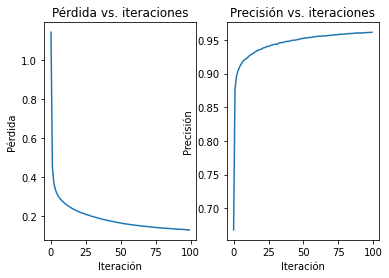

In [70]:
#
# Resultados
#

# Error y precisión vs iteraciones
plt.subplot(1,2,1)
plt.plot(historia.history['loss'])
plt.title('Pérdida vs. iteraciones')
plt.ylabel('Pérdida')
plt.xlabel('Iteración')

plt.subplot(1,2,2)
plt.plot(historia.history['accuracy'])
plt.title('Precisión vs. iteraciones')
plt.ylabel('Precisión')
plt.xlabel('Iteración')

plt.show()

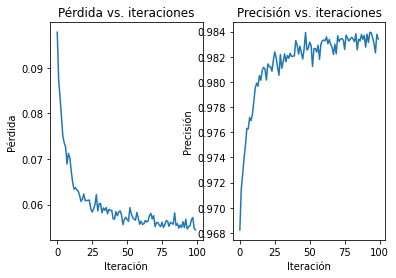

In [130]:
#
# Resultados
#

# Error y precisión vs iteraciones
plt.subplot(1,2,1)
plt.plot(historia.history['loss'])
plt.title('Pérdida vs. iteraciones')
plt.ylabel('Pérdida')
plt.xlabel('Iteración')

plt.subplot(1,2,2)
plt.plot(historia.history['accuracy'])
plt.title('Precisión vs. iteraciones')
plt.ylabel('Precisión')
plt.xlabel('Iteración')

plt.show()

In [127]:
historia = modelo.fit(X_train, Y_train, epochs=num_epochs, batch_size=batch_size, verbose=1)

Epoch 1/100
59/59 [==============================] - 0s 6ms/step - loss: 0.0978 - accuracy: 0.9682
Epoch 2/100
59/59 [==============================] - 0s 6ms/step - loss: 0.0875 - accuracy: 0.9715
Epoch 3/100
59/59 [==============================] - 0s 6ms/step - loss: 0.0835 - accuracy: 0.9726
Epoch 4/100
59/59 [==============================] - 0s 6ms/step - loss: 0.0793 - accuracy: 0.9739
Epoch 5/100
59/59 [==============================] - 0s 6ms/step - loss: 0.0750 - accuracy: 0.9750
Epoch 6/100
59/59 [==============================] - 0s 6ms/step - loss: 0.0735 - accuracy: 0.9763
Epoch 7/100
59/59 [==============================] - 0s 6ms/step - loss: 0.0726 - accuracy: 0.9763
Epoch 8/100
59/59 [==============================] - 0s 6ms/step - loss: 0.0689 - accuracy: 0.9772
Epoch 9/100
59/59 [==============================] - 0s 6ms/step - loss: 0.0712 - accuracy: 0.9769
Epoch 10/100
59/59 [==============================] - 0s 6ms/step - loss: 0.0703 - accuracy: 0.9774
Epoch 11/

In [89]:
X_test.shape

(10000, 784)

In [131]:
# Calcular la precisión sobre el set de validación
puntaje = modelo.evaluate(X_test[:],Y_test[:],verbose=1)
print('Precisión en el set de validación: {:.3f}%'.format(100*puntaje[1]))

313/313 [==============================] - 0s 894us/step - loss: 0.2198 - accuracy: 0.9479
Precisión en el set de validación: 94.790%


In [165]:
#@title
# Realizar predicción sobre el set de validación y mostrar algunos ejemplos
# de la clasificación resultante
#Y_pred = modelo.predict_classes(X_test)
Y_pred , Y_pred_probability = [np.argmax(modelo.predict(X_test, verbose=1), axis=-1), modelo.predict(X_test)]

313/313 [==============================] - 0s 741us/step


In [163]:
Y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [162]:
Y_pred_probability[0]

array([3.7860787e-07, 1.3547667e-17, 1.3822840e-08, 5.1249248e-05,
       5.7435301e-13, 9.0916153e-08, 9.8224214e-22, 9.9994588e-01,
       4.9957225e-09, 2.3337514e-06], dtype=float32)

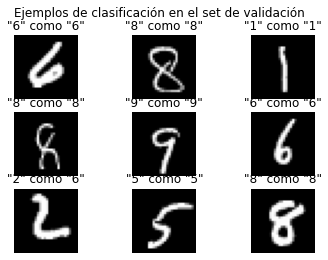

In [123]:
ids_imgs = np.random.randint(0,X_test.shape[0],9)
for i in range(len(ids_imgs)):
	idx = ids_imgs[i]
	img = X_test[idx,:].reshape(28,28)
	cat_original = np.argmax(Y_test[idx,:])
	cat_prediccion = Y_pred[idx]

	plt.subplot(3,3,i+1)
	plt.imshow(img, cmap='gray')
	plt.axis('off')
	plt.title('"{}" como "{}"'.format(cat_original,cat_prediccion))
plt.suptitle('Ejemplos de clasificación en el set de validación')
plt.show()